In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display


In [76]:
customer_reviews = pd.read_excel("CustomerFeedback_reviews - JUPY.xlsx")
customer_reviews

,Review Number,App Name,App Store,App,Store,App ID,Country,Version,Rating,Date,Author,Subject,Review ID,Body,Translated Subject,Translated Body,Sentiment,Device,Language,OS Version,Reply URL,Topics,Custom Topics,Tags,Label1,Label2,Label3,Label4,Product Category 1,Product Category 2,Product Category 3,Product,Product Code,Error Code,Notes,HC function,Unnamed: 36,Dish Care,Laundry Care,Cooking,PCP,Cooling,Review-ID from AIM,Unnamed: 43,Unnamed: 44
0,1,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,English,7.1.0,1,2021-01-01,Kai Harrekilde-Petersen,NaN,gp:AOqpTOGAFE_yBuhsE0sNOtc4jUXX-lQ2bIcoq2oA-BG...,AVOID LIKE THE PLAGUE. Should have been zero s...,NaN,NaN,negative,OnePlus 8 IN2010/IN2013,English,30,https://app.appbot.co/apps/2518608-home-connec...,"[""Connectivity""]","[""Connection & errors""]",NaN,Sporadic connection losses,NaN,NaN,NaN,Laundry Care,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,Polish,7.1.0,2,2021-01-01,Maria Kędziora,NaN,gp:AOqpTOFqQWSLFgMovs6Y7Dwvuo4XkPhNueKt0B5HN3I...,Bardzo słabo się łączy z telefonem. U mnie WFI...,NaN,It connects very poorly with the phone. For me...,negative,Samsung Galaxy Note9 SM-N960F,Polish,29,https://app.appbot.co/apps/2518608-home-connec...,[],[],NaN,Connection speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,English,7.1.0,1,2021-01-01,Tom Zgaj,NaN,gp:AOqpTOFfh1SS85wRwwYlur-ef9fh1V5XOP5vzPZQGa4...,Difficult to add appliance. Restarting app aft...,NaN,NaN,negative,Samsung Galaxy Note9 SM-N960F,English,29,https://app.appbot.co/apps/2518608-home-connec...,"[""Design & UX"", ""Customer Support""]",[],NaN,App reliability,Pairing,NaN,NaN,Laundry Care,NaN,NaN,Washer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,German,NaN,1,2021-01-01,Dieter Willecke,NaN,gp:AOqpTOHsR8_lMnEK8XLxVK-zN9-Xrn9gajjBF-g3Ga3...,Lässt sich nicht mit home connect verbinden (F...,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,Samsung Galaxy Fold/Galaxy Fold 5G,German,29,https://app.appbot.co/apps/2518608-home-connec...,"[""Connectivity"", ""Dissatisfied users""]","[""Connection & errors""]",NaN,Pairing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Home Connect App,iOS,Home Connect App,iOS,901397789,United Arab Emirates,7.1.0,5,2021-01-01,AFosterJX,Do you wanna raise downloads and revenue over ...,6818825526,Please contact me at Skype/WhatsApp: +86189035...,NaN,NaN,mixed,NaN,English,NaN,https://app.appbot.co/apps/598919-home-connect...,"[""Satisfied users"", ""Customer Support"", ""Update""]",[],NaN,Spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188,16165,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,Danish,NaN,1,2025-05-18,Thomas Lauridsen,NaN,0da92629-eb1f-4841-8fe9-e3e9b0d48b17,kan ikke loge på og gentager kan ikke loge på ...,NaN,can't log in and repeats can't log in too diff...,negative,Galaxy A53 5G/Galaxy A53 5G UW,Danish,Android 14.0,https://app.appbot.co/apps/2518608-home-connec...,[],"[""Register - Login - Passw"", ""Log outs""]",[],Login,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16189,16166,Home Connect,Google Play,Home Connect,Google Play,com.bshg.homeconnect.android.release,German,11.6.0,3,2025-05-18,Mario,NaN,f7356ed1-44bf-4bd5-87d9-6e93024f0539,Grundsätzlich funktioniert die App in Verbindu...,NaN,"Generally speaking, the app works well in conj...",neutral,Galaxy S24+ SM-S926B/SM-S92

In [43]:
# getting all the columns
customer_reviews.columns

Index(['Review Number', 'App Name', 'App Store', 'App', 'Store', 'App ID',
       'Country', 'Version', 'Rating', 'Date', 'Author', 'Subject',
       'Review ID', 'Body', 'Translated Subject', 'Translated Body',
       'Sentiment', 'Device', 'Language', 'OS Version', 'Reply URL', 'Topics',
       'Custom Topics', 'Tags', 'Label1', 'Label2', 'Label3', 'Label4',
       'Product Category 1', 'Product Category 2', 'Product Category 3',
       'Product', 'Product Code', 'Error Code', 'Notes', 'HC function',
       'Unnamed: 36', 'Dish Care', 'Laundry Care', 'Cooking', 'PCP', 'Cooling',
       'Review-ID from AIM', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [79]:
# filtering out the unnecessary columns
customer_reviews_subset = customer_reviews[['Rating', 'Date', 'Body', 'Translated Subject', 'Translated Body','Sentiment', 'Custom Topics', 'Label1', 'Label2', 'Label3', 'Label4','Product Category 1', 'Product Category 2', 'Product Category 3',
      'Product' ,'Product Code', 'Error Code', 'HC function']]
customer_reviews_subset


,Rating,Date,Body,Translated Subject,Translated Body,Sentiment,Custom Topics,Label1,Label2,Label3,Label4,Product Category 1,Product Category 2,Product Category 3,Product,Product Code,Error Code,HC function
0,1,2021-01-01,AVOID LIKE THE PLAGUE. Should have been zero s...,NaN,NaN,negative,"[""Connection & errors""]",Sporadic connection losses,NaN,NaN,NaN,Laundry Care,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2021-01-01,Bardzo słabo się łączy z telefonem. U mnie WFI...,NaN,It connects very poorly with the phone. For me...,negative,[],Connection speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2021-01-01,Difficult to add appliance. Restarting app aft...,NaN,NaN,negative,[],App reliability,Pairing,NaN,NaN,Laundry Care,NaN,NaN,Washer,NaN,NaN,NaN
3,1,2021-01-01,Lässt sich nicht mit home connect verbinden (F...,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,"[""Connection & errors""]",Pairing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2021-01-01,Please contact me at Skype/WhatsApp: +86189035...,NaN,NaN,mixed,[],Spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188,1,2025-05-18,kan ikke loge på og gentager kan ikke loge på ...,NaN,can't log in and repeats can't log in too diff...,negative,"[""Register - Login - Passw"", ""Log outs""]",Login,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16189,3,2025-05-18,Grundsätzlich funktioniert die App in Verbindu...,NaN,"Generally speaking, the app works well in conj...",neutral,"[""Connection & errors"", ""Dishcare App Reviews""]",Feature Shutdown,NaN,NaN,NaN,Dish Care,NaN,NaN,NaN,NaN,NaN,NaN
16190,1,2025-05-18,Does not allow to set liters (default are gall...,NaN,NaN,negative,[],Language,NaN,NaN,NaN,Dish Care,NaN,NaN,NaN,NaN,NaN,NaN
16191,3,2025-05-18,Push notifications stopped working. App was wo...,NaN,NaN,negative,"[""Notifications""]",Push Notification,Feature Shutdown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Missing Value check
customer_reviews_subset.isna().sum()


Rating                             0
Date                               0
Body                               0
Translated Subject             12871
Translated Body                 3587
                               ...  
Label1_spam                        0
Label1_terms and conditions        0
Label1_various                     0
Label1_watch                       0
Label1_nan                         0
Length: 71, dtype: int64

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Date'}>]], dtype=object)

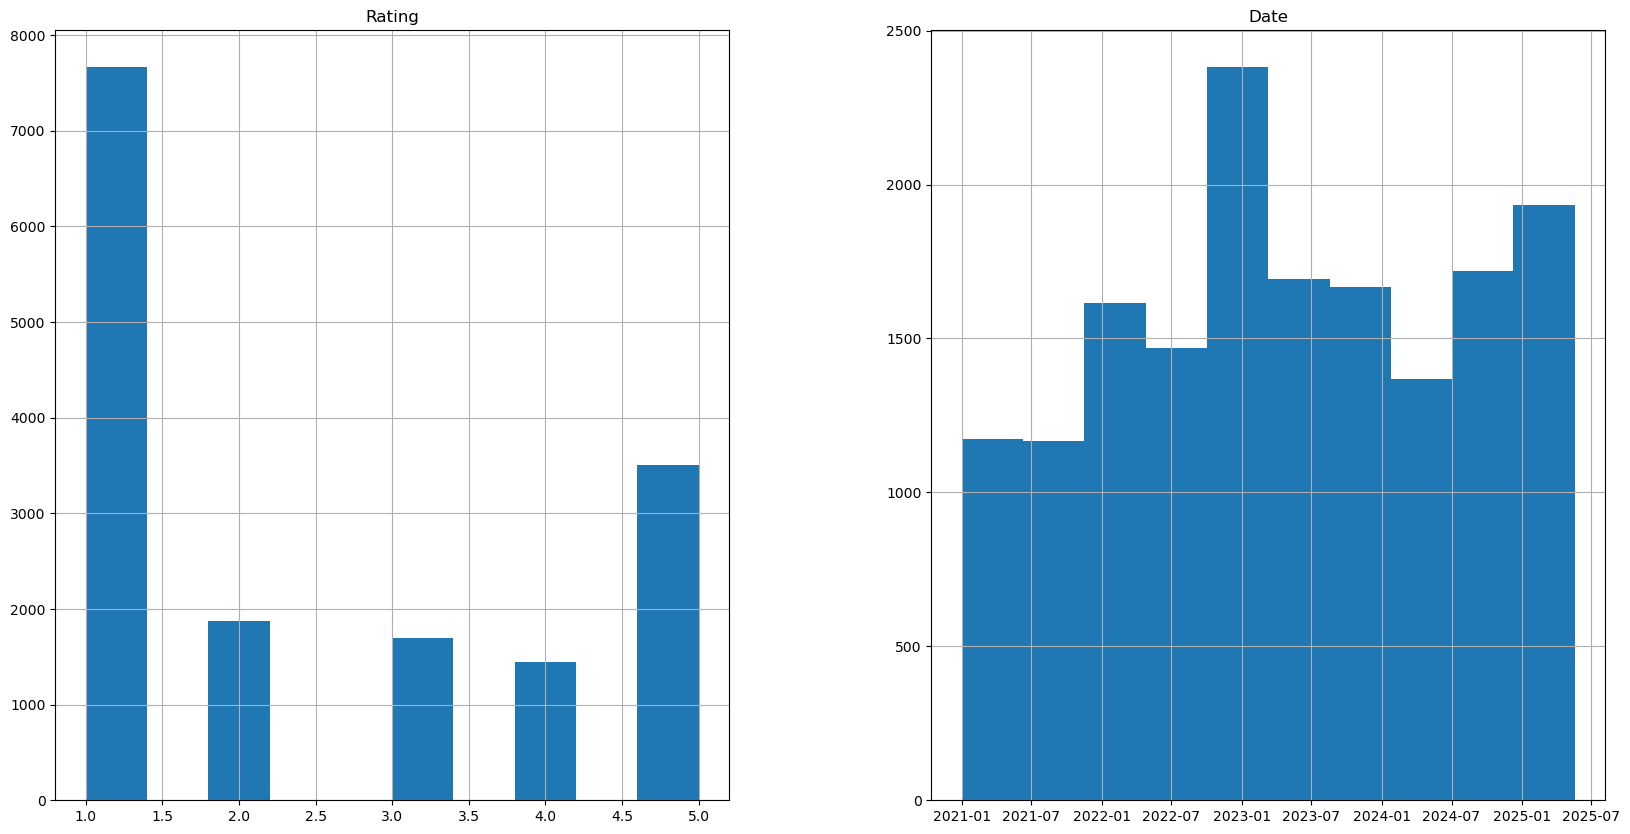

In [40]:
# exploring the outliers
customer_reviews_subset.hist(figsize = (20,10))


In [48]:
# One_Hot Encoder 
ohe = OneHotEncoder(handle_unknown = "ignore", sparse_output = False).set_output (transform = "pandas")

In [80]:
ohetransform = ohe.fit_transform(customer_reviews_subset[['Product Category 1']])
ohetransform

# Merge the ohetransform with the customer_reviews_subset and drop the product Category columns
customer_reviews_subset = pd.concat([customer_reviews_subset,ohetransform], axis = 1).drop(columns = ['Product Category 1', 'Product Category 2', 'Product Category 3'])
customer_reviews_subset


,Rating,Date,Body,Translated Subject,Translated Body,Sentiment,Custom Topics,Label1,Label2,Label3,Label4,Product,Product Code,Error Code,HC function,Product Category 1_Consumer Products,Product Category 1_Cooking,Product Category 1_Cooling,Product Category 1_Dish Care,Product Category 1_Laundry Care,Product Category 1_PCP,Product Category 1_nan
0,1,2021-01-01,AVOID LIKE THE PLAGUE. Should have been zero s...,NaN,NaN,negative,"[""Connection & errors""]",Sporadic connection losses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,2021-01-01,Bardzo słabo się łączy z telefonem. U mnie WFI...,NaN,It connects very poorly with the phone. For me...,negative,[],Connection speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2021-01-01,Difficult to add appliance. Restarting app aft...,NaN,NaN,negative,[],App reliability,Pairing,NaN,NaN,Washer,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,2021-01-01,Lässt sich nicht mit home connect verbinden (F...,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,"[""Connection & errors""]",Pairing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2021-01-01,Please contact me at Skype/WhatsApp: +86189035...,NaN,NaN,mixed,[],Spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16188,1,2025-05-18,kan ikke loge på og gentager kan ikke loge på ...,NaN,can't log in and repeats can't log in too diff...,negative,"[""Register - Login - Passw"", ""Log outs""]",Login,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16189,3,2025-05-18,Grundsätzlich funktioniert die App in Verbindu...,NaN,"Generally speaking, the app works well in conj...",neutral,"[""Connection & errors"", ""Dishcare App Reviews""]",Feature Shutdown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16190,1,2025-05-18,Does not allow to set liters (default are gall...,NaN,NaN,negative,[],Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16191,3,2025-05-18,Push notifications stopped working. App was wo...,NaN,NaN,negative,"[""Notifications""]",Push Notification,Feature Shutdown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
ohetransform = ohe.fit_transform(customer_reviews_subset[['Label1']])
ohetransform

# merge the ohetransform with the customer_reviews_subset and drop the label columns
customer_reviews_subset = pd.concat([customer_reviews_subset,ohetransform], axis = 1).drop(columns = ['Label1', 'Label2', 'Label3', 'Label4'])


KeyError: "None of [Index(['Label1'], dtype='object')] are in the [columns]"

In [88]:
ohetransform = ohe.fit_transform(customer_reviews_subset[['Product']])
ohetransform

# Merge the ohetransform with the customer_reviews_subset and drop the product Category columns
customer_reviews_subset = pd.concat([customer_reviews_subset,ohetransform], axis = 1).drop(columns = ['Product'])


KeyError: "None of [Index(['Product'], dtype='object')] are in the [columns]"

In [89]:
ohetransform = ohe.fit_transform(customer_reviews_subset[['HC function']])
ohetransform

# Merge the ohetransform with the customer_reviews_subset and drop the HC function columns
customer_reviews_subset = pd.concat([customer_reviews_subset,ohetransform], axis = 1).drop(columns = ['HC function'])


KeyError: "None of [Index(['HC function'], dtype='object')] are in the [columns]"

In [90]:
# chckeing if the labels are correct
pd.options.display.max_columns = None
display(customer_reviews_subset.head(4)
)

,Rating,Date,Body,Translated Subject,Translated Body,Sentiment,Custom Topics,Product Code,Error Code,Product Category 1_Consumer Products,Product Category 1_Cooking,Product Category 1_Cooling,Product Category 1_Dish Care,Product Category 1_Laundry Care,Product Category 1_PCP,Product Category 1_nan,Label1_3rd Party,Label1_App Crash,Label1_App availability,Label1_App compatibility,Label1_App crash,Label1_App functions,Label1_App installation,Label1_App performance,Label1_App reliability,Label1_App start,Label1_Barrier free use,Label1_Connection Other,Label1_Connection losses after update,Label1_Connection other,Label1_Connection speed,Label1_Customer Service,Label1_Device functions,Label1_Feature Shutdown,Label1_Firmware Update,Label1_Firmware update,Label1_Improvement ideas,Label1_Language,Label1_Login,Label1_Pairing,Label1_Password reset,Label1_Post update functionality issues,Label1_Price Performance,Label1_Program Download,Label1_Push Notification,Label1_Recipes,Label1_Registration,Label1_Remote Start/Control,Label1_Spam,Label1_Sporadic connection losses,Label1_Terms and conditions,Label1_Too many ads / wrong ads,Label1_Unclear,Label1_Usability,Label1_Various,Label1_Watch,Label1_app crash,Label1_app installation,Label1_app performance,Label1_connection other,Label1_connection speed,Label1_login,Label1_pairing,Label1_recipes,Label1_remote Start/Control,Label1_spam,Label1_terms and conditions,Label1_various,Label1_watch,Label1_nan,Product_Coffeemaker,Product_Cookit,Product_Dryer,Product_Hob,Product_Hood,Product_MUM,Product_Oven,Product_Oven/Microwave Combi,Product_Refrigerator,Product_Roxxter,Product_Washer,Product_Washer Dryers,Product_nan,HC function_Appliance Usage Statistics,HC function_Brandify,HC function_Camera in the Oven,HC function_Camera in the oven,HC function_Delayed Start,HC function_Detergent Dosing,HC function_Detergent Scanner,HC function_Favorites,HC function_Notification Center,HC function_Program Assistance,HC function_Program Favorites,HC function_Program Helper Cooking,HC function_SingleKeyID,HC function_Smart Start,HC function_Smart Watch,HC function_Tab Counter,HC function_User manuals,HC function_Widget,HC function_nan
0,1,2021-01-01,AVOID LIKE THE PLAGUE. Should have been zero s...,NaN,NaN,negative,"[""Connection & errors""]",NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2021-01-01,Bardzo słabo się łączy z telefonem. U mnie WFI...,NaN,It connects very poorly with the phone. For me...,negative,[],NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,2021-01-01,Difficult to add appliance. Restarting app aft...,NaN,NaN,negative,[],NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,2021-01-01,Lässt sich nicht mit home connect verbinden (F...,NaN,Cannot be connected to home connect (Fold 2 / ...,negative,"[""Connection & errors""]",NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [96]:
list(customer_reviews_subset.columns)

['Rating',
 'Date',
 'Body',
 'Translated Subject',
 'Translated Body',
 'Sentiment',
 'Custom Topics',
 'Product Code',
 'Error Code',
 'Product Category 1_Consumer Products',
 'Product Category 1_Cooking',
 'Product Category 1_Cooling',
 'Product Category 1_Dish Care',
 'Product Category 1_Laundry Care',
 'Product Category 1_PCP',
 'Product Category 1_nan',
 'Label1_3rd Party',
 'Label1_App Crash',
 'Label1_App availability',
 'Label1_App compatibility',
 'Label1_App crash',
 'Label1_App functions',
 'Label1_App installation',
 'Label1_App performance',
 'Label1_App reliability',
 'Label1_App start',
 'Label1_Barrier free use',
 'Label1_Connection Other',
 'Label1_Connection losses after update',
 'Label1_Connection other',
 'Label1_Connection speed',
 'Label1_Customer Service',
 'Label1_Device functions',
 'Label1_Feature Shutdown',
 'Label1_Firmware Update',
 'Label1_Firmware update',
 'Label1_Improvement ideas',
 'Label1_Language',
 'Label1_Login',
 'Label1_Pairing',
 'Label1_Pass

In [101]:
# Define the predictors and response variables
X = customer_reviews_subset.copy()

# Drop the response variables
X.drop(['Product Category 1_Consumer Products',
 'Product Category 1_Cooking',
 'Product Category 1_Cooling',
 'Product Category 1_Dish Care',
 'Product Category 1_Laundry Care',
 'Product Category 1_PCP',
 'Product Category 1_nan',
 'Label1_3rd Party',
 'Label1_App Crash',
 'Label1_App availability',
 'Label1_App compatibility',
 'Label1_App crash',
 'Label1_App functions',
 'Label1_App installation',
 'Label1_App performance',
 'Label1_App reliability',
 'Label1_App start',
 'Label1_Barrier free use',
 'Label1_Connection Other',
 'Label1_Connection losses after update',
 'Label1_Connection other',
 'Label1_Connection speed',
 'Label1_Customer Service',
 'Label1_Device functions',
 'Label1_Feature Shutdown',
 'Label1_Firmware Update',
 'Label1_Firmware update',
 'Label1_Improvement ideas',
 'Label1_Language',
 'Label1_Login',
 'Label1_Pairing',
 'Label1_Password reset',
 'Label1_Post update functionality issues',
 'Label1_Price Performance',
 'Label1_Program Download',
 'Label1_Push Notification',
 'Label1_Recipes',
 'Label1_Registration',
 'Label1_Remote Start/Control',
 'Label1_Spam',
 'Label1_Sporadic connection losses',
 'Label1_Terms and conditions',
 'Label1_Too many ads / wrong ads',
 'Label1_Unclear',
 'Label1_Usability',
 'Label1_Various',
 'Label1_Watch',
 'Label1_app crash',
 'Label1_app installation',
 'Label1_app performance',
 'Label1_connection other',
 'Label1_connection speed',
 'Label1_login',
 'Label1_pairing',
 'Label1_recipes',
 'Label1_remote Start/Control',
 'Label1_spam',
 'Label1_terms and conditions',
 'Label1_various',
 'Label1_watch',
 'Label1_nan',
 'Product_Coffeemaker',
 'Product_Cookit',
 'Product_Dryer',
 'Product_Hob',
 'Product_Hood',
 'Product_MUM',
 'Product_Oven',
 'Product_Oven/Microwave Combi',
 'Product_Refrigerator',
 'Product_Roxxter',
 'Product_Washer',
 'Product_Washer Dryers',
 'Product_nan',
 'HC function_Appliance Usage Statistics',
 'HC function_Brandify',
 'HC function_Camera in the Oven',
 'HC function_Camera in the oven',
 'HC function_Delayed Start',
 'HC function_Detergent Dosing',
 'HC function_Detergent Scanner',
 'HC function_Favorites',
 'HC function_Notification Center',
 'HC function_Program Assistance',
 'HC function_Program Favorites',
 'HC function_Program Helper Cooking',
 'HC function_SingleKeyID',
 'HC function_Smart Start',
 'HC function_Smart Watch',
 'HC function_Tab Counter',
 'HC function_User manuals',
 'HC function_Widget',
 'HC function_nan'], axis = 1, inplace = True)




In [102]:
y = customer_reviews_subset[['Product Category 1_Consumer Products',
 'Product Category 1_Cooking',
 'Product Category 1_Cooling',
 'Product Category 1_Dish Care',
 'Product Category 1_Laundry Care',
 'Product Category 1_PCP',
 'Product Category 1_nan',
 'Label1_3rd Party',
 'Label1_App Crash',
 'Label1_App availability',
 'Label1_App compatibility',
 'Label1_App crash',
 'Label1_App functions',
 'Label1_App installation',
 'Label1_App performance',
 'Label1_App reliability',
 'Label1_App start',
 'Label1_Barrier free use',
 'Label1_Connection Other',
 'Label1_Connection losses after update',
 'Label1_Connection other',
 'Label1_Connection speed',
 'Label1_Customer Service',
 'Label1_Device functions',
 'Label1_Feature Shutdown',
 'Label1_Firmware Update',
 'Label1_Firmware update',
 'Label1_Improvement ideas',
 'Label1_Language',
 'Label1_Login',
 'Label1_Pairing',
 'Label1_Password reset',
 'Label1_Post update functionality issues',
 'Label1_Price Performance',
 'Label1_Program Download',
 'Label1_Push Notification',
 'Label1_Recipes',
 'Label1_Registration',
 'Label1_Remote Start/Control',
 'Label1_Spam',
 'Label1_Sporadic connection losses',
 'Label1_Terms and conditions',
 'Label1_Too many ads / wrong ads',
 'Label1_Unclear',
 'Label1_Usability',
 'Label1_Various',
 'Label1_Watch',
 'Label1_app crash',
 'Label1_app installation',
 'Label1_app performance',
 'Label1_connection other',
 'Label1_connection speed',
 'Label1_login',
 'Label1_pairing',
 'Label1_recipes',
 'Label1_remote Start/Control',
 'Label1_spam',
 'Label1_terms and conditions',
 'Label1_various',
 'Label1_watch',
 'Label1_nan',
 'Product_Coffeemaker',
 'Product_Cookit',
 'Product_Dryer',
 'Product_Hob',
 'Product_Hood',
 'Product_MUM',
 'Product_Oven',
 'Product_Oven/Microwave Combi',
 'Product_Refrigerator',
 'Product_Roxxter',
 'Product_Washer',
 'Product_Washer Dryers',
 'Product_nan',
 'HC function_Appliance Usage Statistics',
 'HC function_Brandify',
 'HC function_Camera in the Oven',
 'HC function_Camera in the oven',
 'HC function_Delayed Start',
 'HC function_Detergent Dosing',
 'HC function_Detergent Scanner',
 'HC function_Favorites',
 'HC function_Notification Center',
 'HC function_Program Assistance',
 'HC function_Program Favorites',
 'HC function_Program Helper Cooking',
 'HC function_SingleKeyID',
 'HC function_Smart Start',
 'HC function_Smart Watch',
 'HC function_Tab Counter',
 'HC function_User manuals',
 'HC function_Widget',
 'HC function_nan']]

In [104]:
# Splitting the data into training, validation and test sets
# training set = 60%, validation set = 20%, test_set = 20%

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y,test_size = .20, random_state = 1)
X_train, X_valid, y_train_valid, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = .25, random_state = 1)

In [105]:
X.shape

(16193, 9)

In [107]:
X_train.shape

(9715, 9)

In [108]:
X_valid.shape

(3239, 9)

In [109]:
X_test.shape

(3239, 9)